In [52]:
from PIL import Image, ImageDraw
from difflib import SequenceMatcher

blank = Image.open('/Users/Gever/Documents/ipython/BlankImage1000x1000.png', 'r')
COLOR_HI = (0,0,0)
print "Blank canvas is", (blank.width, blank.height)

Blank canvas is (1000, 1000)


In [53]:
# returns a percentage of similarity
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def palindromish_color(v):
    s_v = str(v)
    p = similar(s_v, s_v[::-1])
    if p == 1.0:  # actual palindrome, go GREEN
        return(0,255,0)
    
    #calculate shade of grey
    p = int(similar(s_v, s_v[::-1]) * 255)
    return (p,p,p)

# render a section of the numeric space
def render(start, img):
    canvas = ImageDraw.Draw(img)
    length = img.width * img.height
    count = 0
    index = 0
    for y in xrange(img.height):
        for x in xrange(img.width):
            count = (y * img.width) + x
            index = start + count        # a potentially big number
            canvas.point((x,y), palindromish_color(index))
    return index

current index: 999999


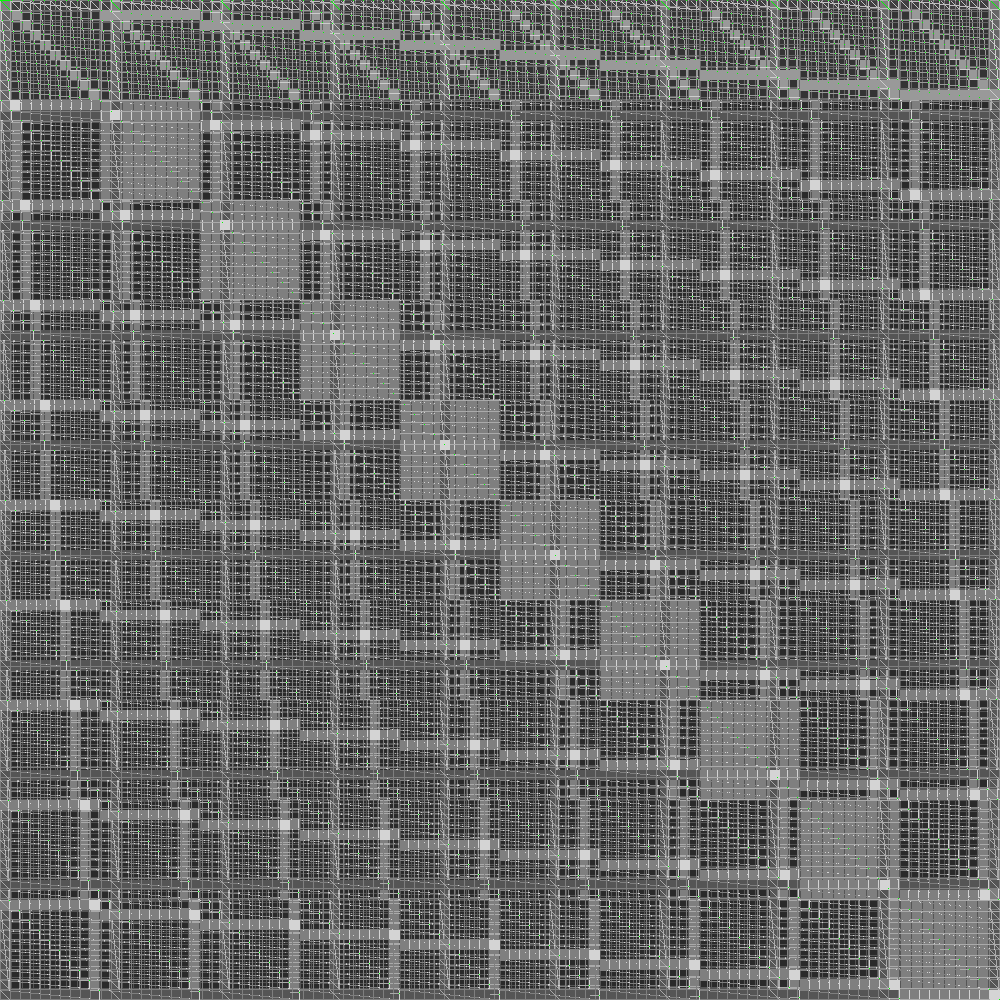

In [54]:
# render starting at zero
img1 = blank.copy()
current_index = render(0, img1)
print "current index:", current_index
img1

current index: 1999998


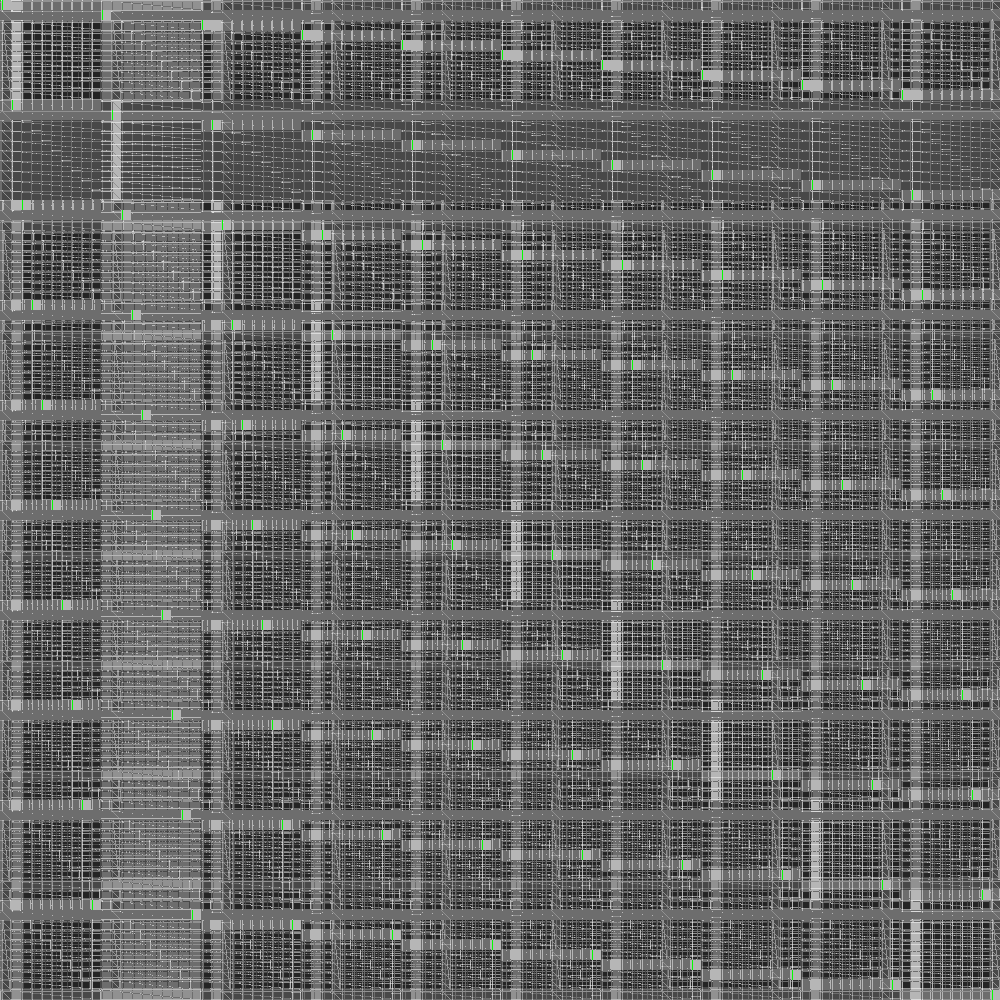

In [55]:
img2 = blank.copy()
current_index = render(current_index, img2)
print "current index:", current_index
img2